In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
pd.options.display.max_columns=100
plt.style.use('ggplot')

In [3]:
df=pd.read_excel('ESB_adoption_dataset_v3_update_august_2022.xlsx',sheet_name='Sheet 1. District-level data')
df.columns=df.columns.str.strip()

In [4]:
states=geopandas.read_file(r"C:\Users\berid\python\geopandas\s_22mr22_states\s_22mr22.shp")

In [5]:
zips=geopandas.read_file(r"C:\Users\berid\python\geopandas\tl_2019_us_zcta510_zipcodes\tl_2019_us_zcta510.shp")

In [6]:
fips=geopandas.read_file(r"C:\Users\berid\python\geopandas\tl_2018_us_county\tl_2018_us_county.shp")

In [7]:
cities=geopandas.read_file(r"C:\Users\berid\python\geopandas\tl_2022_us_cities\tl_2022_us_county.shp")

In [8]:
df['1a. State']=df['1a. State'].str.title()
df['1f. City']=df['1f. City'].str.title()
df['1h. ZIP code']=df['1h. ZIP code'].astype(str).str.replace('\.0','')

C:\Users\berid\AppData\Local\Temp\ipykernel_5508\1840196127.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['1h. ZIP code']=df['1h. ZIP code'].astype(str).str.replace('\.0','')


In [9]:
filtered=pd.concat([df[['1a. State','1f. City','1h. ZIP code','1s. Latitude','1t. Longitude']],df[df.columns[df.columns.str.startswith('4')]]],axis=1)

In [10]:
merged=filtered.merge(zips[['GEOID10','geometry']],left_on='1h. ZIP code',right_on='GEOID10')
merged=geopandas.GeoDataFrame(merged)

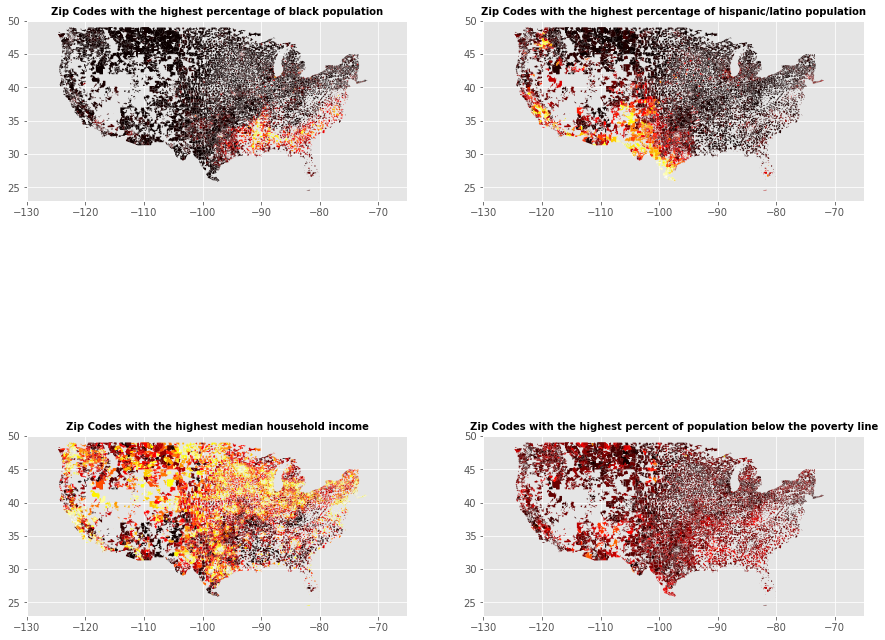

In [11]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,14))

merged.plot(ax=ax1,column='4k. Percent race alone or multiracial: Black',cmap='hot')
ax1.set_title('Zip Codes with the highest percentage of black population',fontweight='bold',size=10)
ax1.set_xlim(-130,-65)
ax1.set_ylim(23,50)

merged.plot(ax=ax2,column='4u. Percent Hispanic or Latino (of any race)',cmap='hot')
ax2.set_title('Zip Codes with the highest percentage of hispanic/latino population',fontweight='bold',size=10)
ax2.set_xlim(-130,-65)
ax2.set_ylim(23,50)

merged.plot(ax=ax3,column='4f. Median household income',cmap='hot')
ax3.set_title('Zip Codes with the highest median household income',fontweight='bold',size=10)
ax3.set_xlim(-130,-65)
ax3.set_ylim(23,50)

merged.plot(ax=ax4,column='4g. Percent of population below the poverty level',cmap='hot')
ax4.set_title('Zip Codes with the highest percent of population below the poverty line',fontweight='bold',size=10)
ax4.set_xlim(-130,-65)
ax4.set_ylim(23,50)

plt.subplots_adjust(hspace=0.2)
plt.show()

In [12]:
grouped=df.groupby('1f. City')['4g. Percent of population below the poverty level'].mean().reset_index()
grouped['1f. City']=grouped['1f. City'].str.title()

grouped=grouped.merge(cities[['NAME','geometry']],left_on='1f. City',right_on='NAME')
grouped=geopandas.GeoDataFrame(grouped)

grouped['Long']=grouped['geometry'].centroid.x
grouped['Lat']=grouped['geometry'].centroid.y

grouped=grouped[grouped['4g. Percent of population below the poverty level']>0.3]

C:\Users\berid\AppData\Local\Temp\ipykernel_5508\197746434.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped['Long']=grouped['geometry'].centroid.x
C:\Users\berid\AppData\Local\Temp\ipykernel_5508\197746434.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped['Lat']=grouped['geometry'].centroid.y


In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [27]:
states['Long']=states['geometry'].centroid.x
states['Lat']=states['geometry'].centroid.y

C:\Users\berid\AppData\Local\Temp\ipykernel_5508\185004359.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states['Long']=states['geometry'].centroid.x
C:\Users\berid\AppData\Local\Temp\ipykernel_5508\185004359.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states['Lat']=states['geometry'].centroid.y


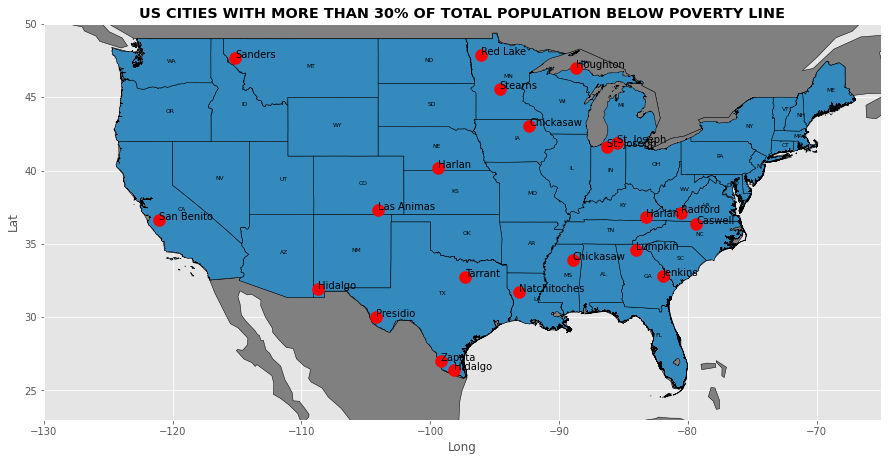

In [34]:
fig,ax=plt.subplots(figsize=(15,10))

world.plot(ax=ax,ec='black',color='grey')
states.plot(ax=ax,ec='black')
grouped.plot(ax=ax,x='Long',y='Lat',kind='scatter',s=145,color='red',marker='o')

def value_labels(x,y,z):
    for i in range(len(x)):
        if -130<x.iloc[i]<-65 and 23<y.iloc[i]<50:
            ax.text(x.iloc[i],y.iloc[i],z.iloc[i],size=10)
        else:
            None
value_labels(grouped['Long'],grouped['Lat'],grouped['1f. City'])

for i in range(len(states)):
    if -130<states['Long'].iloc[i]<-65 and 23<states['Lat'].iloc[i]<50:
        ax.text(states['Long'].iloc[i],states['Lat'].iloc[i],states['STATE'].iloc[i],size=6)
    else:
        None

ax.set_xlim(-130,-65)
ax.set_ylim(23,50)
ax.set_title('US CITIES WITH MORE THAN 30% OF TOTAL POPULATION BELOW POVERTY LINE',fontweight='bold')
plt.show()

C:\Users\berid\AppData\Local\Temp\ipykernel_5508\318724166.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped['Long']=grouped['geometry'].centroid.x
C:\Users\berid\AppData\Local\Temp\ipykernel_5508\318724166.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped['Lat']=grouped['geometry'].centroid.y


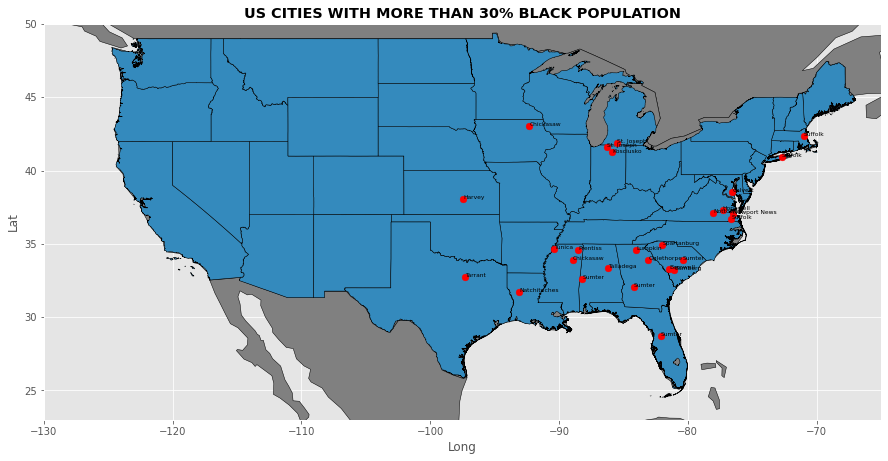

In [40]:
grouped=df.groupby('1f. City')['4k. Percent race alone or multiracial: Black'].mean().reset_index()
grouped['1f. City']=grouped['1f. City'].str.title()

grouped=grouped.merge(cities[['NAME','geometry']],left_on='1f. City',right_on='NAME')
grouped=geopandas.GeoDataFrame(grouped)

grouped['Long']=grouped['geometry'].centroid.x
grouped['Lat']=grouped['geometry'].centroid.y

grouped=grouped[grouped['4k. Percent race alone or multiracial: Black']>0.4]




fig,ax=plt.subplots(figsize=(15,10))

world.plot(ax=ax,ec='black',color='grey')
states.plot(ax=ax,ec='black')
grouped.plot(ax=ax,x='Long',y='Lat',kind='scatter',s=45,color='red',marker='o')

def value_labels(x,y,z):
    for i in range(len(x)):
        if -130<x.iloc[i]<-65 and 23<y.iloc[i]<50:
            ax.text(x.iloc[i],y.iloc[i],z.iloc[i],size=6)
        else:
            None
value_labels(grouped['Long'],grouped['Lat'],grouped['1f. City'])

ax.set_xlim(-130,-65)
ax.set_ylim(23,50)
ax.set_title('US CITIES WITH MORE THAN 30% BLACK POPULATION',fontweight='bold')
plt.show()